<a href="https://colab.research.google.com/github/jyun0618/TAVE_MLab/blob/main/Chapter08/jiyun_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 8 차원 축소

### #1
> 데이터셋의 차원을 축소하는 주요 목적은 무엇인가요? 대표적인 단점은 무엇인가요?

**목적**
* 훈련 알고리즘의 속도를 높이기 위함
* 데이터 시각화
* 메모리 공간 절약(압축)

**단점**
* 정보 손실로 훈련 알고리즘의 성능 감소 가능성
* 계산 비용이 높음
* 머신러닝 파이프라인의 복잡도를 증가시킴
* 변환된 데이터 해석의 어려움

### #2
> 차원의 저주란 무엇인가요?

저차원 공간에는 없는 많은 문제가 고차원 공간에서 일어난다는 사실을 뜻함

머신러닝에서 랜덤으로 선택된 고차원 벡터는 일반적으로 서로 멀리 떨어져 있어 과대적합의 위험이 크며 데이터의 양이 많지 않을 경우에는 패턴을 잡아내기 매우 어렵다

### #3
> 데이터셋의 차원을 축소시키고 나서 이 작업을 원상 복구할 수 있나요? 할 수 있다면 어떻게 가능할까요? 가능하지 않다면 왜일까요?

일부 정보가 차원 축소 과정에서 사라지기 때문에 이를 완벽하게 되돌리는 것은 불가능

PCA같은 일부 알고리즘은 비교적 원본과 비슷한 데이터셋을 재구성할 수 있는 간단한 역변환 방법을 가지고 있지만 T-SNE 같은 다른 알고리즘은 그렇지 않음

### #4
> 매우 비선형적인 데이터셋의 차원을 축소하는 데 PCA를 사용할 수 있을까요?

PCA는 불필요한 차원을 제거할 수 있기 때문에 매우 비선형적이라도 대부분의 데이터셋에서 차원을 축소하는 데 사용할 수 있음

그러나 불필요한 차원이 없다면 PCA의 차원 축소는 너무 많은 정보를 잃게 됨

e.g. 스위스롤은 펼쳐져야 하며 말려진 것을 뭉개면 안 됨

### #5
> 설명된 분산을 95%로 지정한 PCA를 1,000개의 차원을 가진 데이터셋에 적용한다고 가정하겠습니다. 결과 데이터셋의 차원은 얼마나 될까요?

답은 데이터셋에 따라 잘라지고 1에서 950 사이의 어떤 수도 될 수 있음

차원 수에 대한 함수로 설명된 분산의 그래프를 그려보는 것이 데이터셋에 내재된 차원 수를 대략적으로 가늠할 수 있는 한 가지 방법

### #6
> 기본 PCA, 점진적 PCA, 랜덤 PCA, 랜덤 투영은 각각 어느 경우에 사용될까요?

기본 PCA를 우선적으로 사용

점진적 PCA: 메모리에 담을 수 없는 대용량 데이터셋에 적합 / 실시간으로 PCA를 적용해야 하는 온라인 작업에 사용 가능

랜덤 PCA: 데이터셋이 메모리 크기에 맞고 차원을 크게 축소시킬 때 사용

랜덤 투영: 매우 고차원인 데이터셋에 적합

### #7
> 어떤 데이터셋에 적용한 차원 축소 알고리즘의 성능을 어떻게 평가할 수 있을까요?

데이터셋에서 너무 많은 정보를 잃지 않으면서 차원을 많이 제거할 수 있다면 차원 축소 알고리즘이 잘 작동한 것

→ 역변환 수행으로 재구성 오차를 측정하는 방법
→ 전처리 단계에서 차원 축소를 사용한 뒤 두번째 알고리즘의 성능을 측정하여 원본 데이터셋 성능과의 차이 비교

### #8
> 두 개의 차원 축소 알고리즘을 연결할 수 있을까요?

가능

PCA나 랜덤 투영으로 불필요한 차원을 대폭 제거한 뒤 LLE 같이 훨씬 느린 알고리즘을 적옹하는 것이 대표적

→ LLE만 사용했을 때와 비슷한 성능이지만 속도 감소

### #9
> MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다(처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다).

In [1]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
X_train = mnist['data'][:60000]
X_test = mnist['data'][60000:]

y_train = mnist['target'][:60000]
y_test = mnist['target'][60000:]

>  이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다.

In [3]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [4]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [5]:
print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 5.66s


In [6]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9492

> 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요?

In [8]:
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [9]:
print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 20.65s


*이 장에서 보았듯이 차원 축소는 언제나 훈련 시간을 줄여주지 못합니다. 데이터셋, 모델, 훈련 알고리즘에 따라 달라집니다.*

> 이제 테스트 세트에서 이 분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

In [10]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8925

차원 축소를 했을 때 유용한 정보를 일부 잃었기 때문에 성능이 조금 감소되는 것이 일반적입니다.

 그렇지만 이 경우에는 성능 감소가 좀 심각한 것 같습니다. 훈련 시간도 느려지고 성능도 감소했습니다.

* 소프트 맥스 함수

In [11]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=2000, random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 778.50s


In [13]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

축소된 데이터셋으로 훈련

In [14]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=2000, random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 196.48s


In [16]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9236

**PCA는 속도를 아주 빠르게 만들어 주지만 항상 그런 것은 아니다!**

### #10
> t-SNE 알고리즘을 사용해 MNIST 데이터셋의 처음 5,000개 이미지를 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색상으로 나타낸 산점도를 그릴 수 있습니다.

In [42]:
# from sklearn.datasets import fetch_mldata

# mnist = fetch_mldata('MNIST original')
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

10000개만 랜덤 샘플링하여 차원축소

In [43]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'].iloc[idx]
y = mnist['target'].iloc[idx]

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42) # 2D로 차원축소
X_reduced = tsne.fit_transform(X)

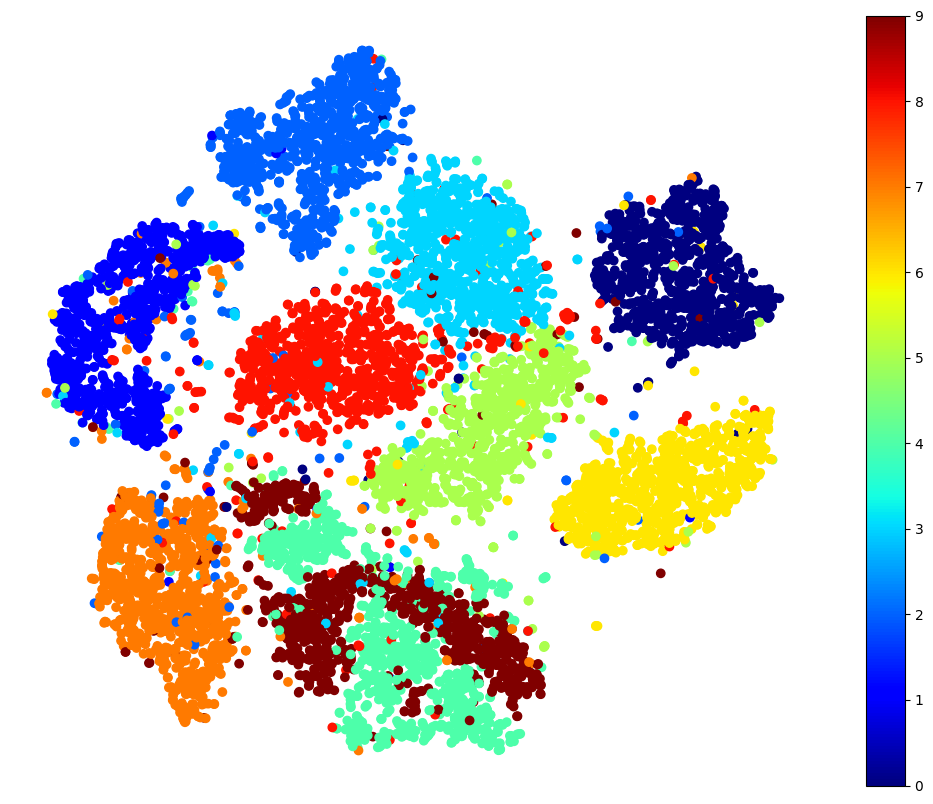

In [45]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet") # 각 숫자마다 다른 색깔을 사용
plt.axis('off')
plt.colorbar()
plt.show()

많이 겹쳐진 것 같은 숫자 4과 9에 집중

<ipython-input-46-bec420d8f26c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-46-bec420d8f26c>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=cmap(digit / 9))


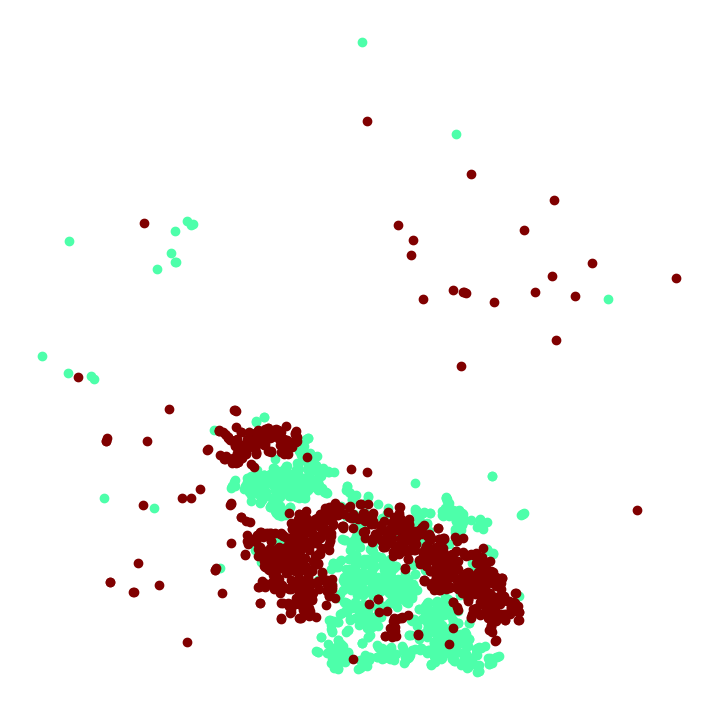

In [46]:
import matplotlib

plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (4, 9):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

두 숫자에 t-SNE 적용

In [47]:
idx = (y == 4) | (y == 9)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

<ipython-input-48-0854d9ff879f>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))


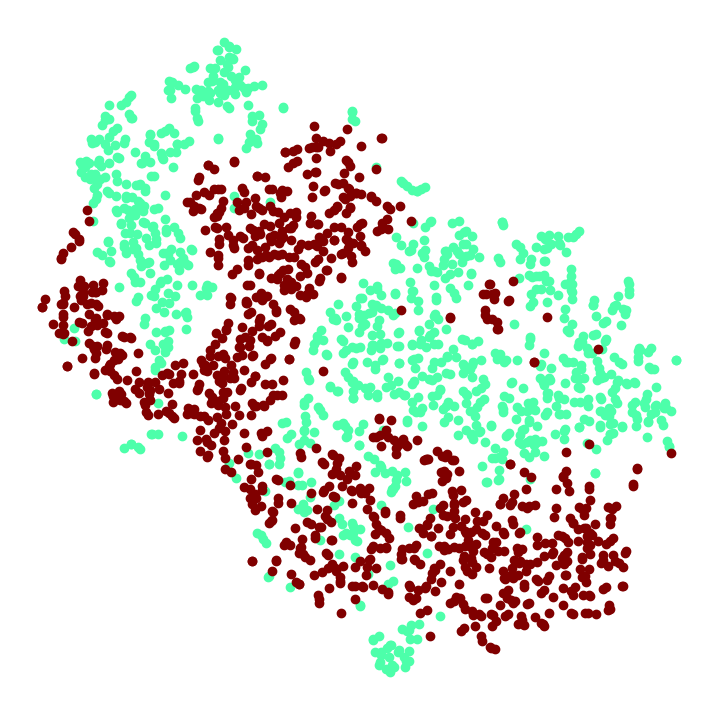

In [48]:
plt.figure(figsize=(9,9))
for digit in (4, 9):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

숫자 4가 두 개의 군집으로 나뉘어져 있음

>  또는 산점도의 각 포인트를 이에 상응하는 샘플의 클래스(0에서 9까지 숫자)로 바꾸거나 숫자 이미지 자체의 크기를 줄여서 그릴 수도 있습니다(모든 숫자를 다 그리면 그래프가 너무 복잡해지므로 랜덤으로 선택한 샘플만 그리거나, 인접한 곳에서 다른 샘플이 그려져 있지 않은 경우에만 그립니다). 잘 분리된 숫자의 군집을 시각화할 수 있을 것입니다.

In [50]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # 입력 특성의 스케일을 0에서 1 사이로 만듭니다.
    X_normalized = MinMaxScaler().fit_transform(X)
    # 그릴 숫자의 좌표 목록을 만듭니다.
    # 반복문 아래에서 `if` 문장을 쓰지 않기 위해 시작할 때 이미 그래프가 그려져 있다고 가정합니다.
    neighbors = np.array([[10., 10.]])
    # 나머지는 이해하기 쉽습니다.
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # 현재 그래프의 축을 가져옵니다.
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

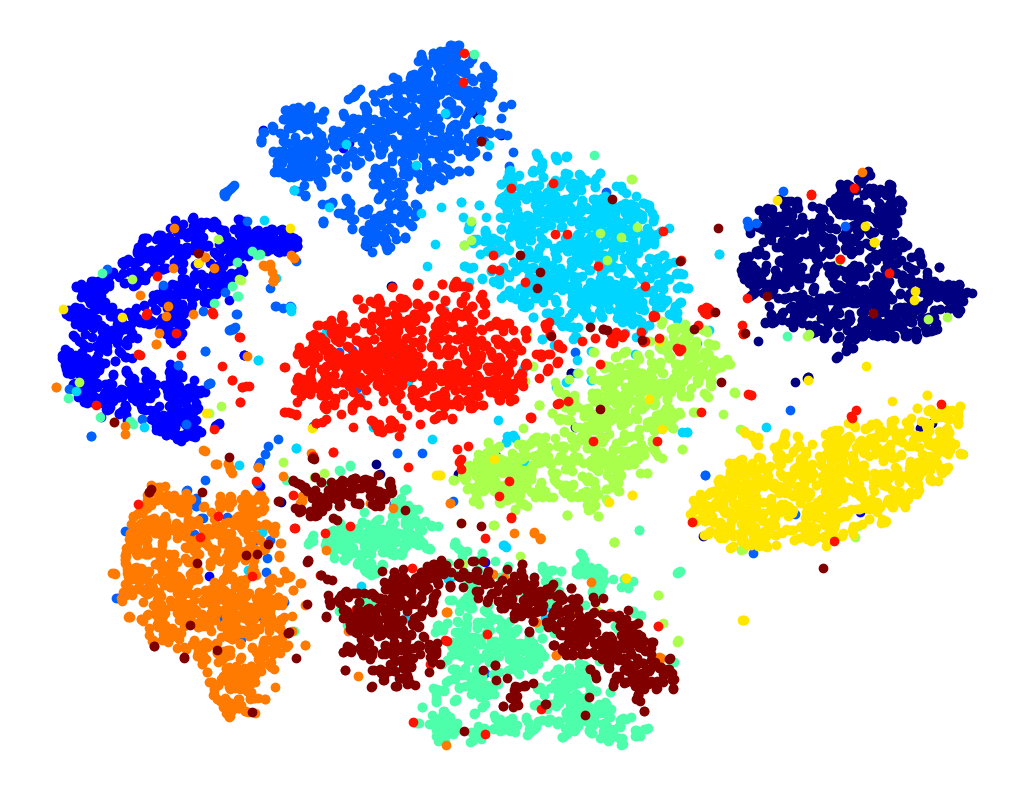

In [51]:
plot_digits(X_reduced, y)

<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

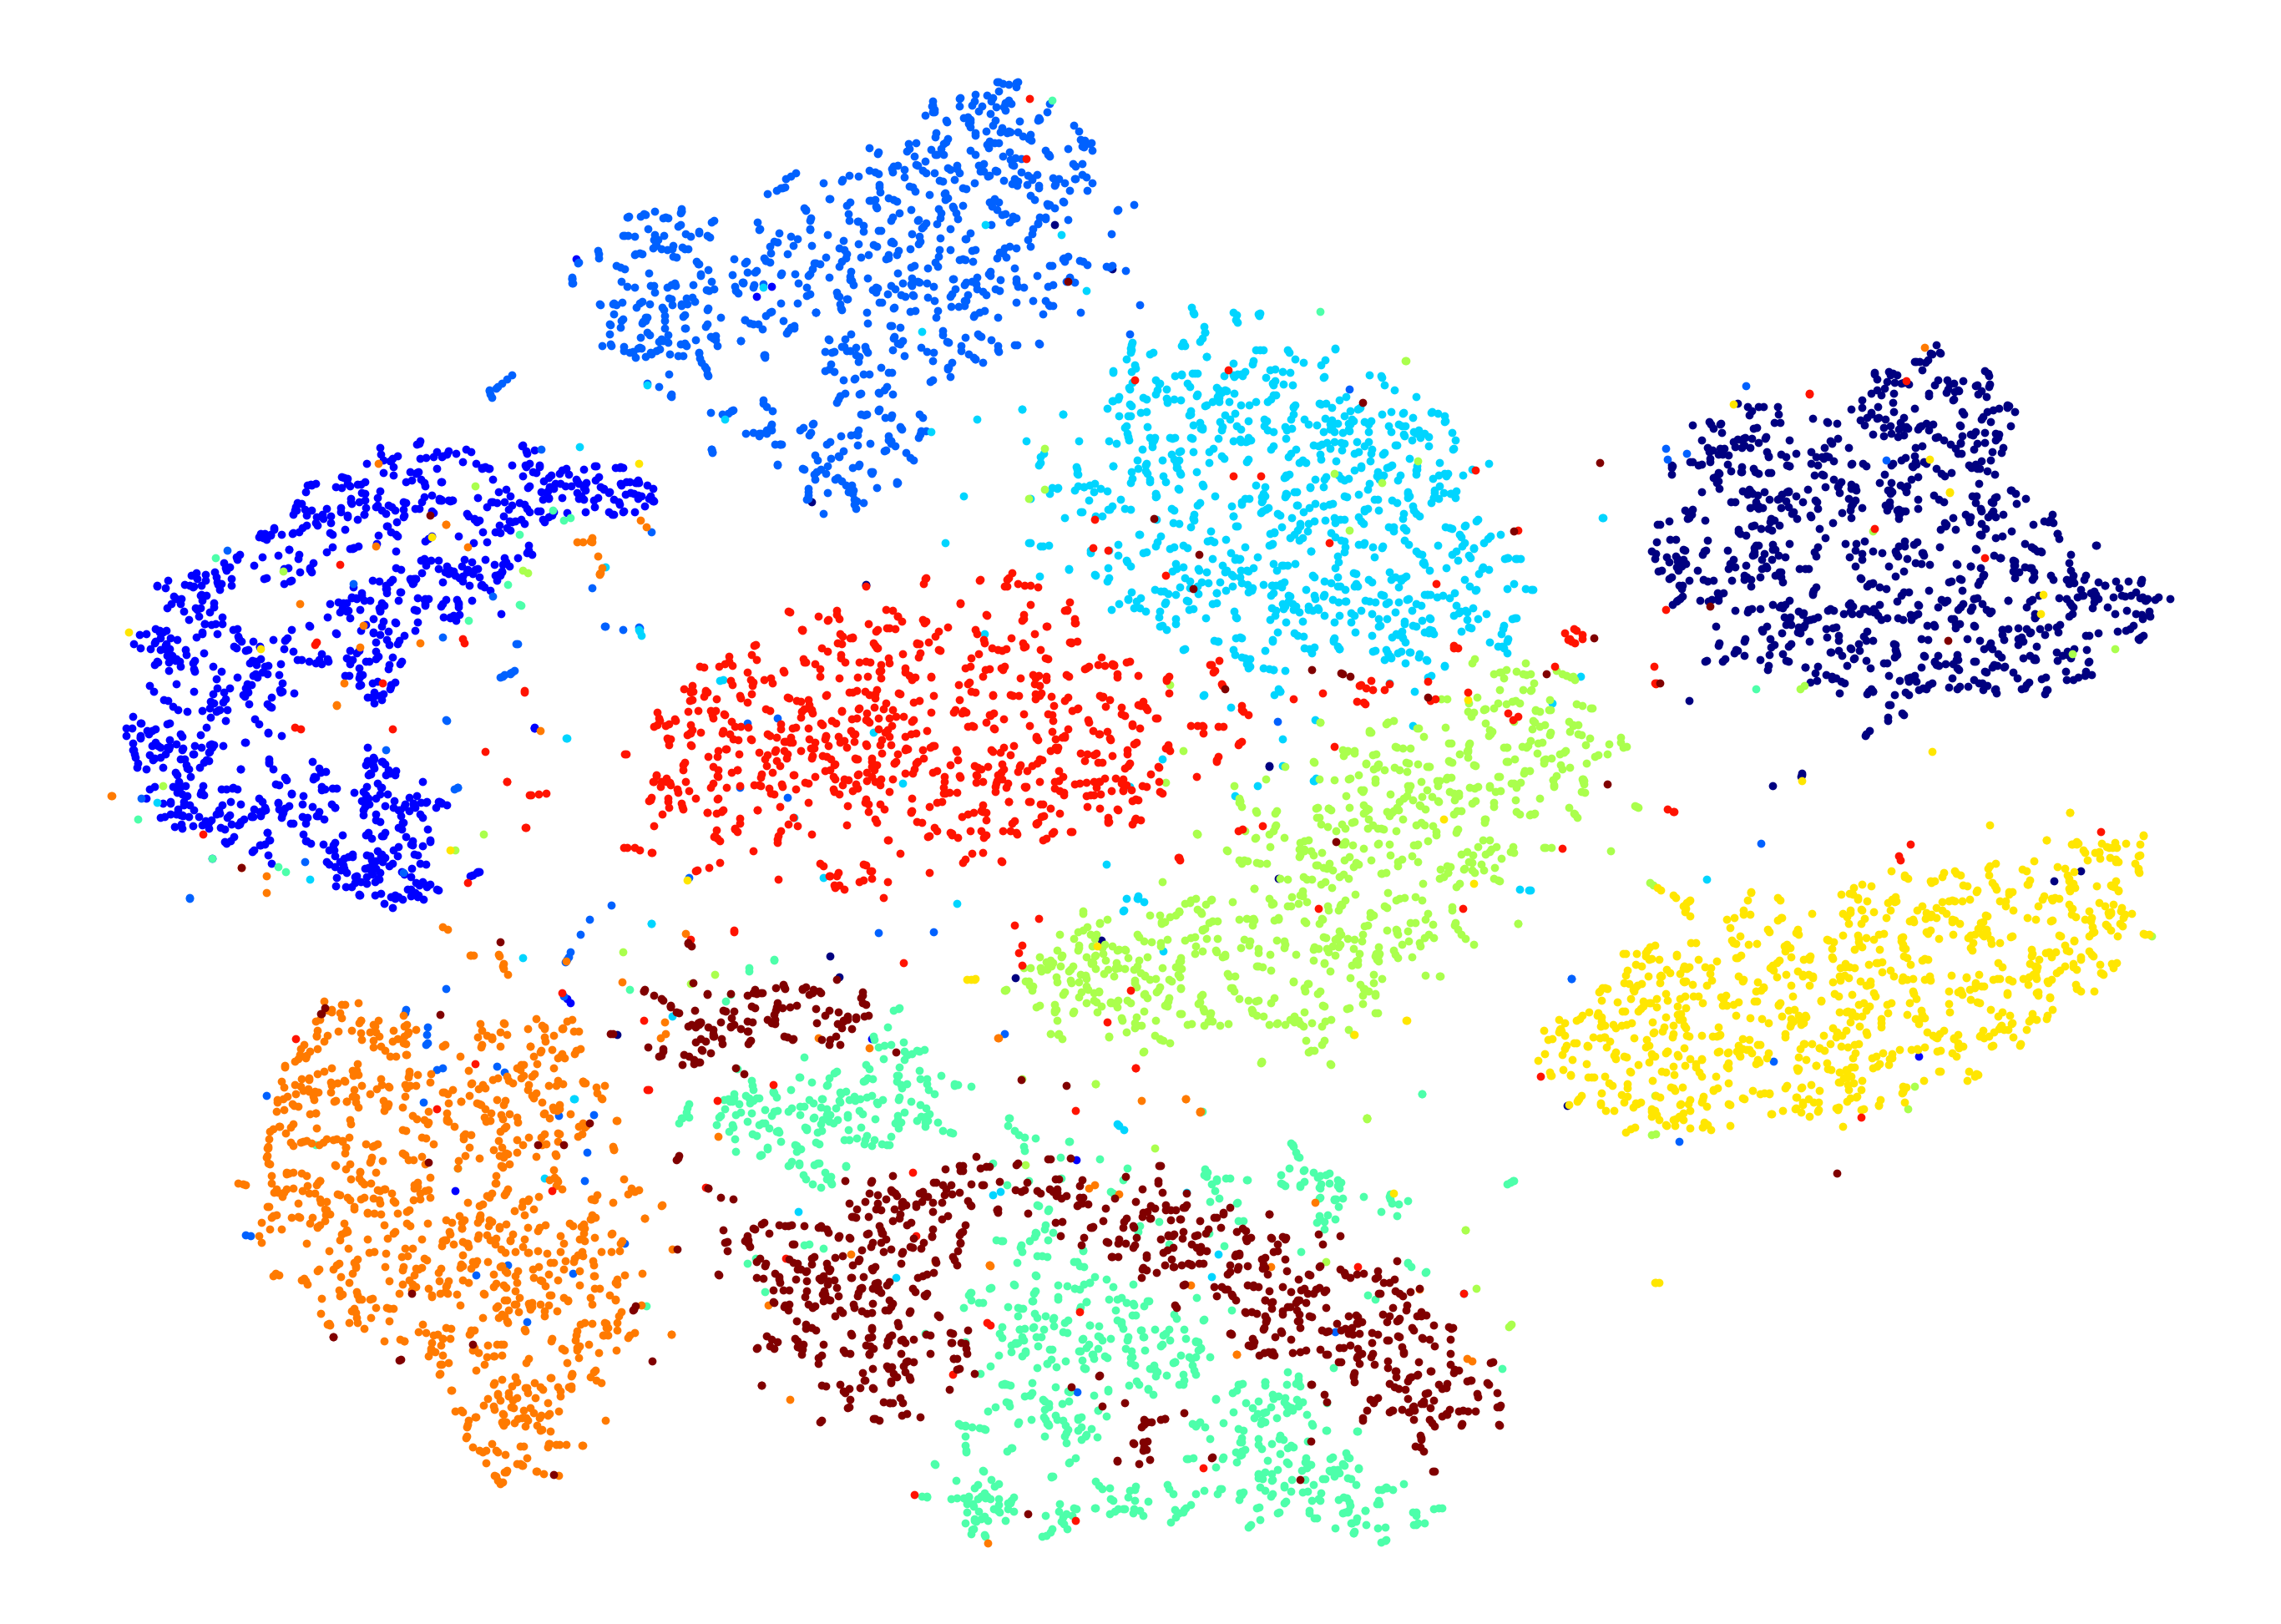

In [52]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

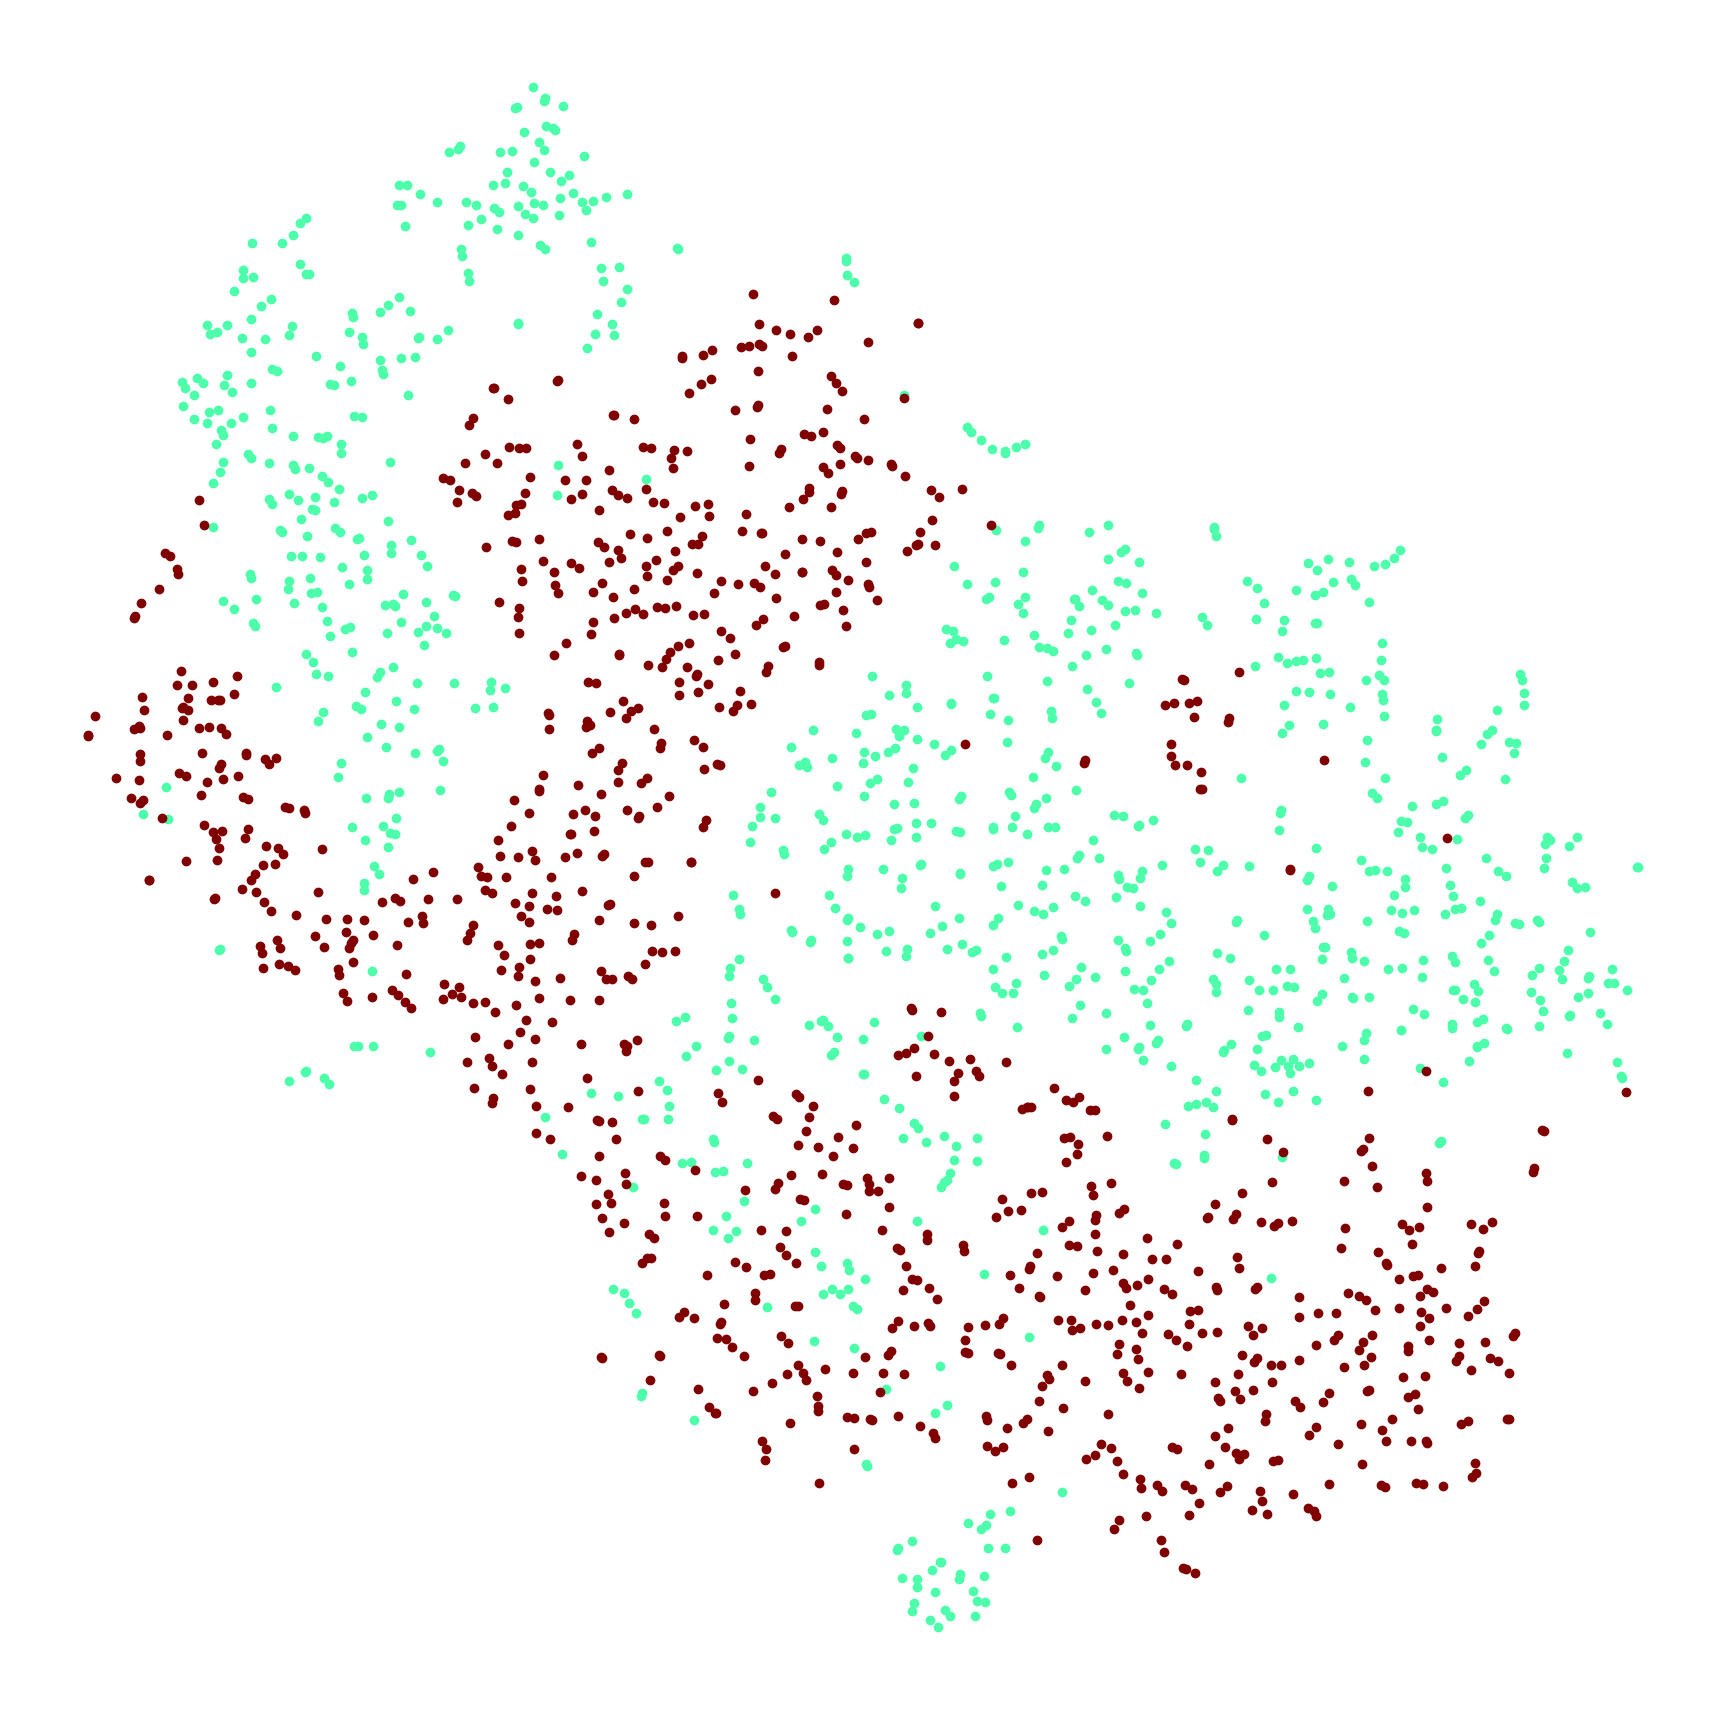

In [53]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

> PCA, LLE, MDS 같은 차원 축소 알고리즘을 적용해보고 시각화 결과를 비교해보세요.

PCA 시간: 0.5s.


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

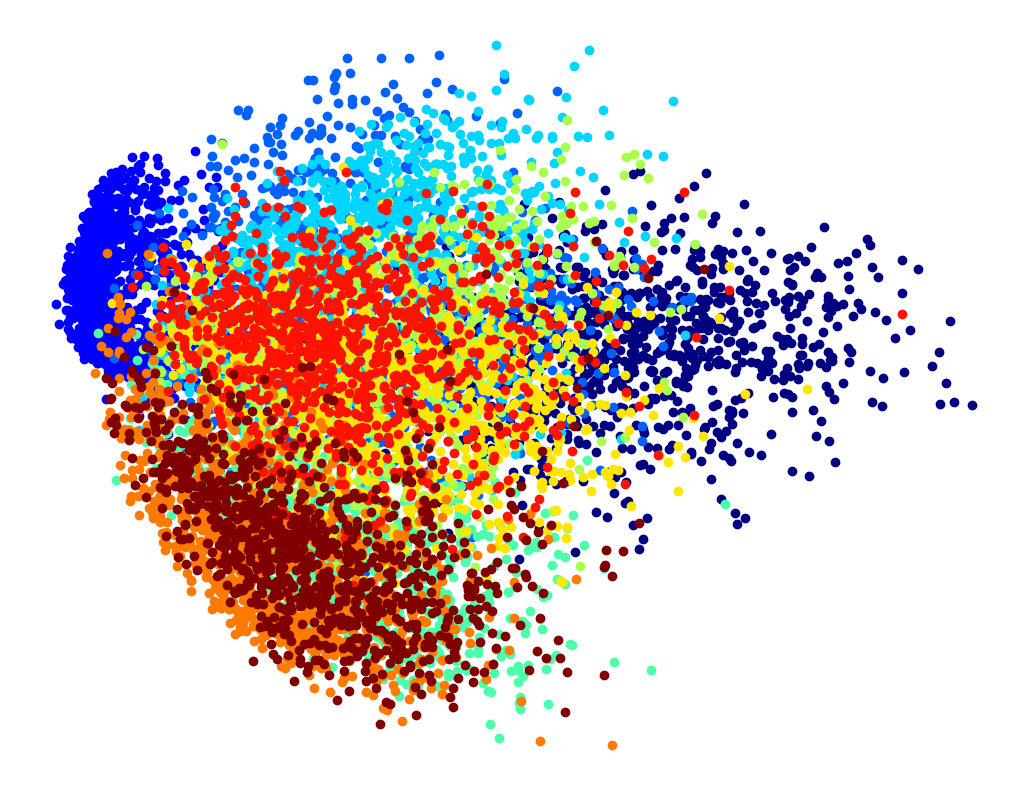

In [54]:
# PCA
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

LLE 시간: 22.2s.


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

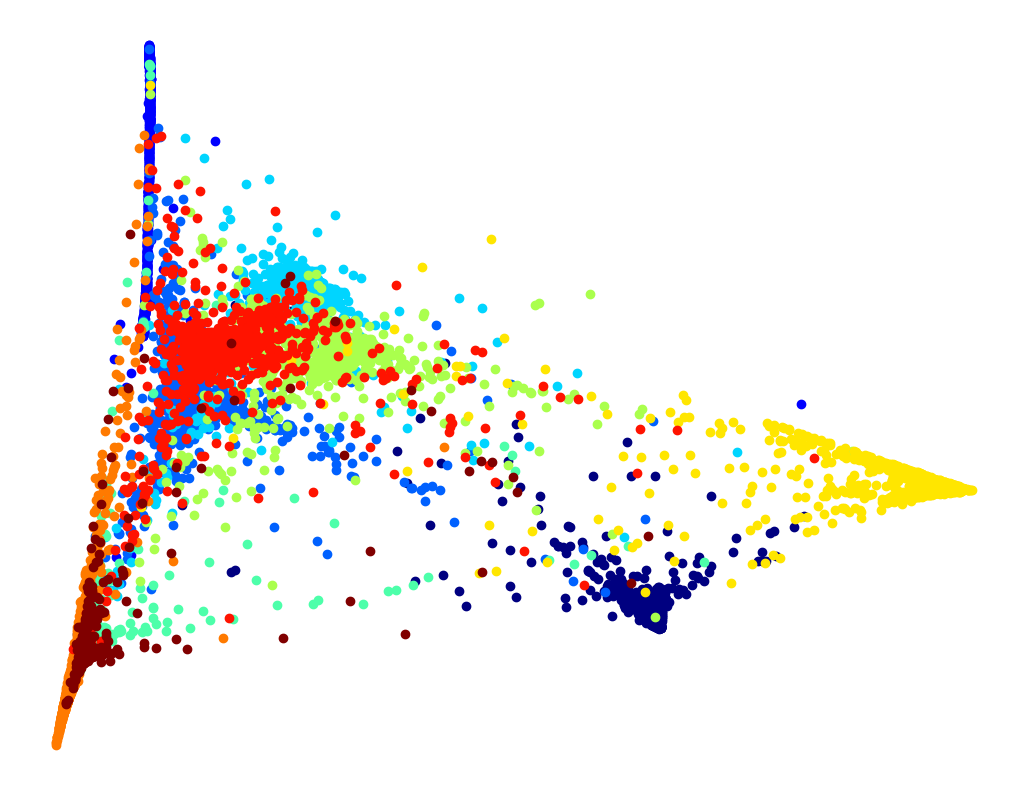

In [56]:
# LLE
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE 시간: 17.3s.


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

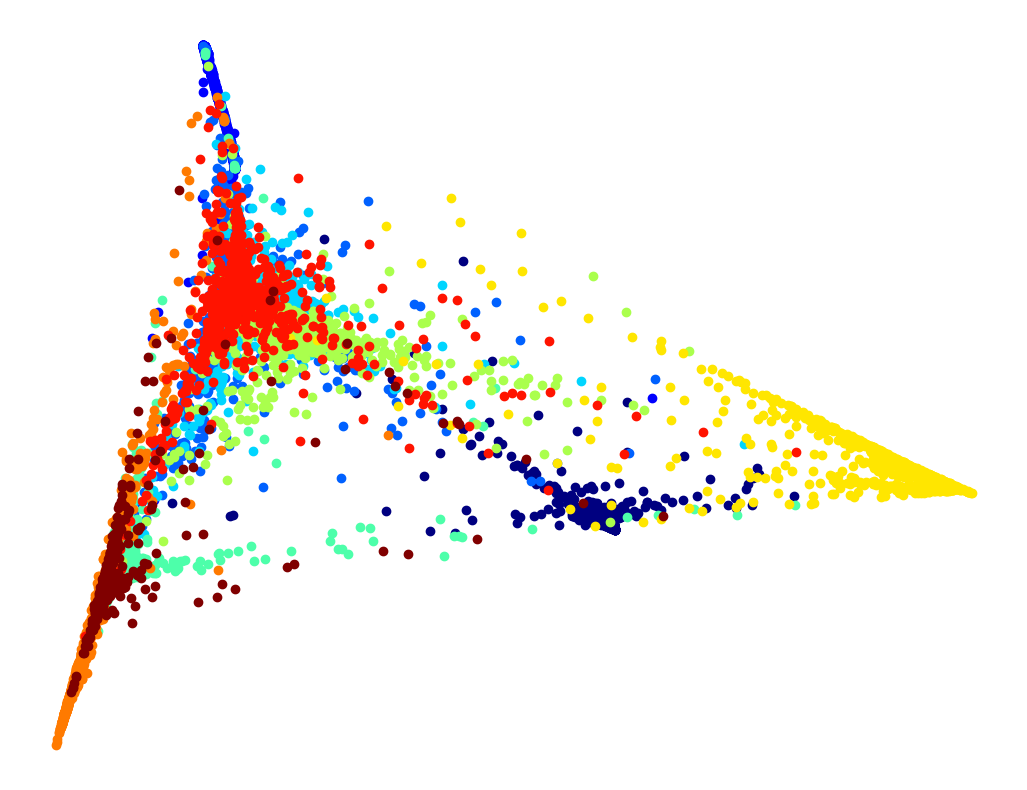

In [57]:
# PCA -> LLE
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS 시간: 138.7s (10,000개가 아니고 2,000 MNIST 이미지에서).


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

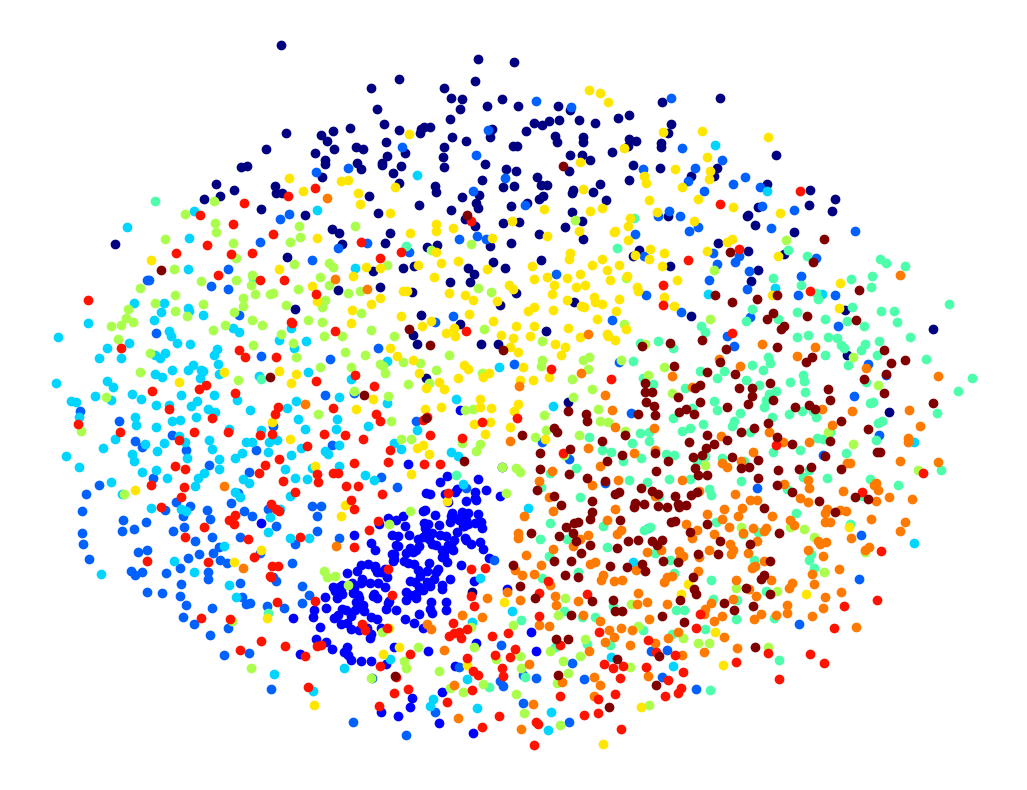

In [58]:
# MDS
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS 시간: {:.1f}s (10,000개가 아니고 2,000 MNIST 이미지에서).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

PCA+MDS 시간: 127.3s (on 2,000 MNIST images).


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

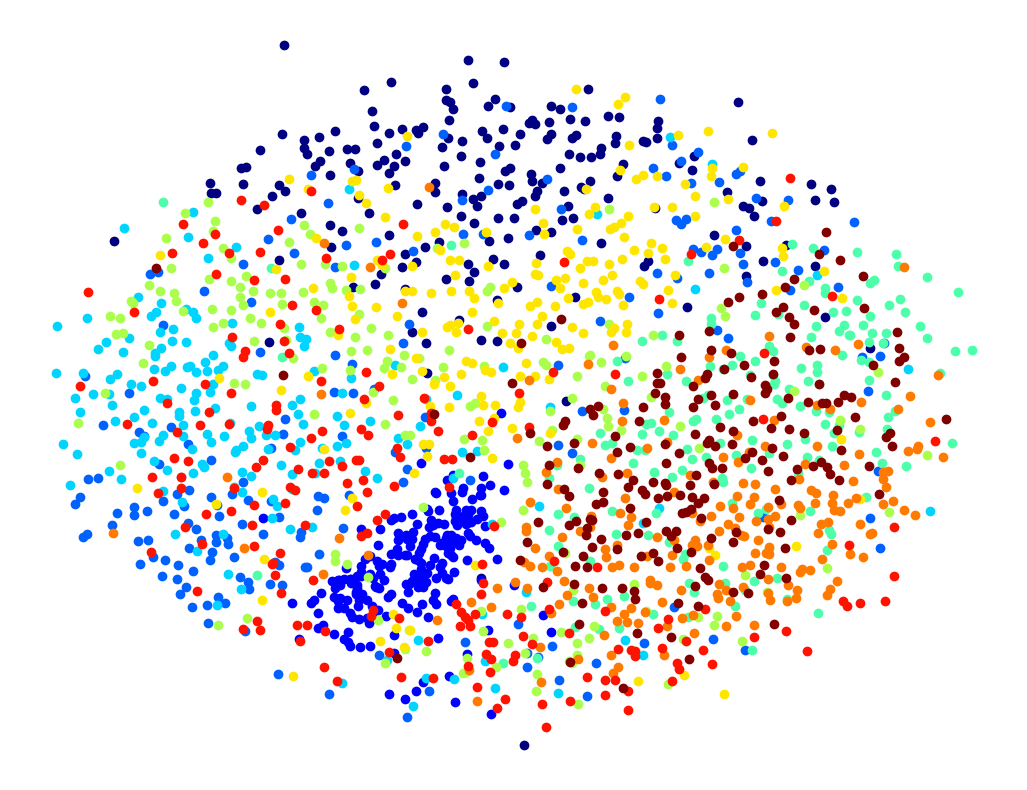

In [59]:
# PCA -> MDS
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS 시간: {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

LDA 시간: 4.9s.


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

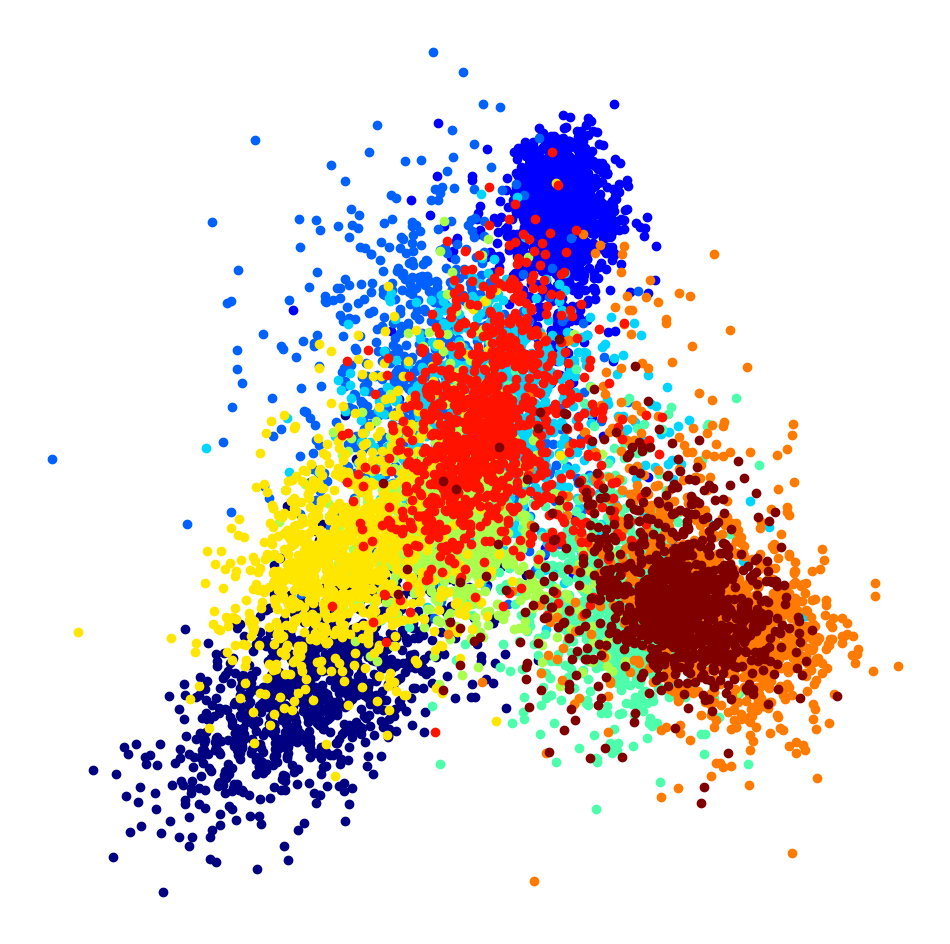

In [60]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

t-SNE 시간: 118.1s.


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

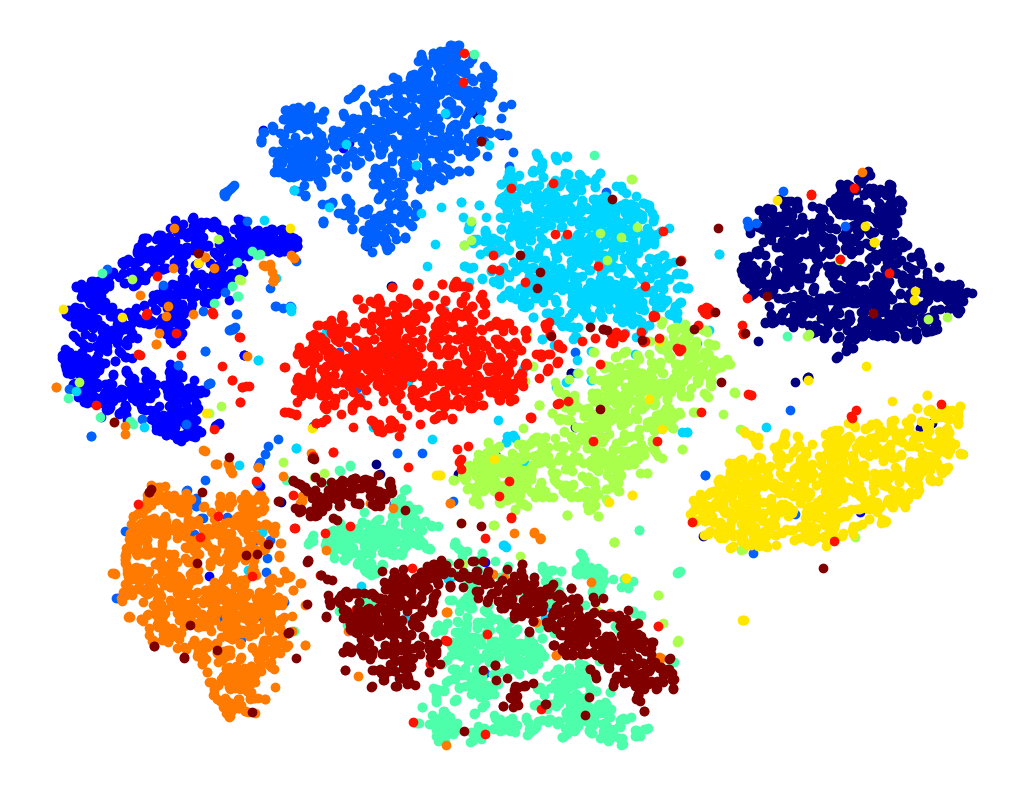

In [61]:
# t-SNE
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

PCA+t-SNE 시간 115.0s.


<ipython-input-50-a47861d34e1d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("jet")
<ipython-input-50-a47861d34e1d>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))


KeyError: 0

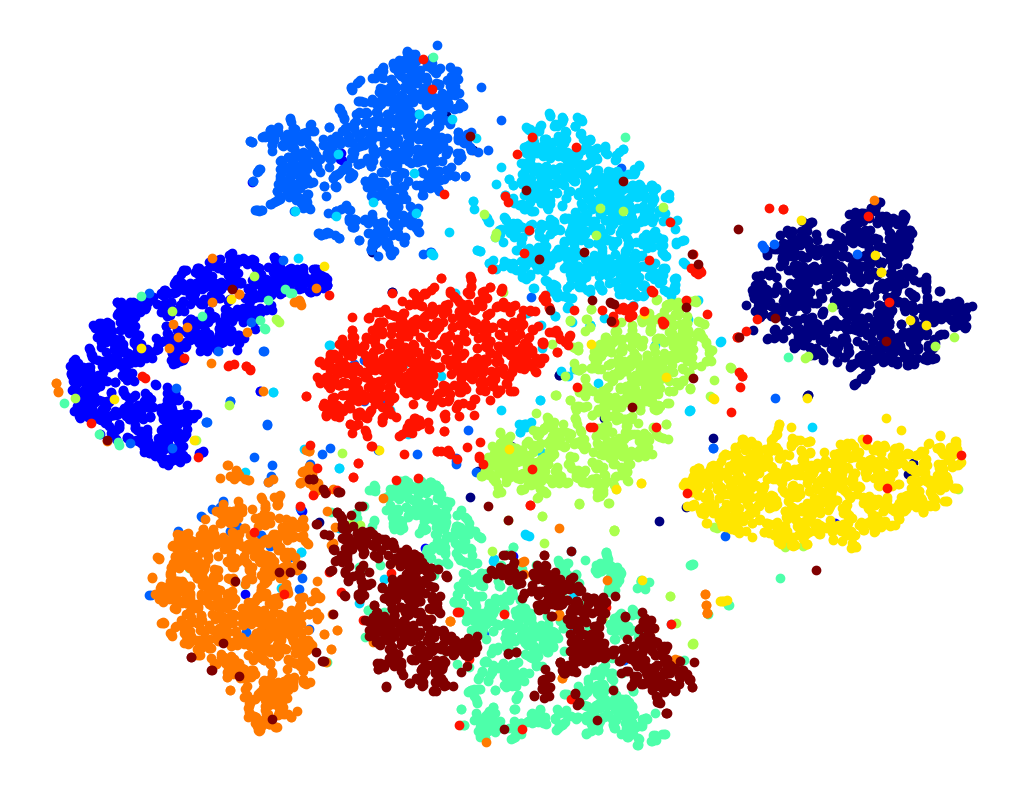

In [62]:
# PCA -> t-SNE
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE 시간 {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

*t-SNE가 제일 좋네요!*